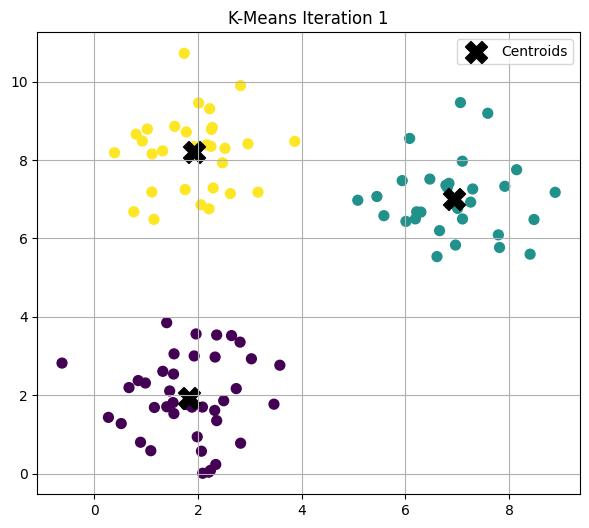

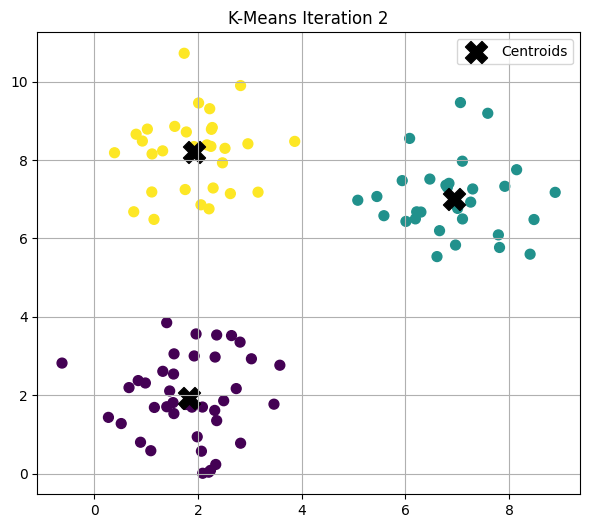

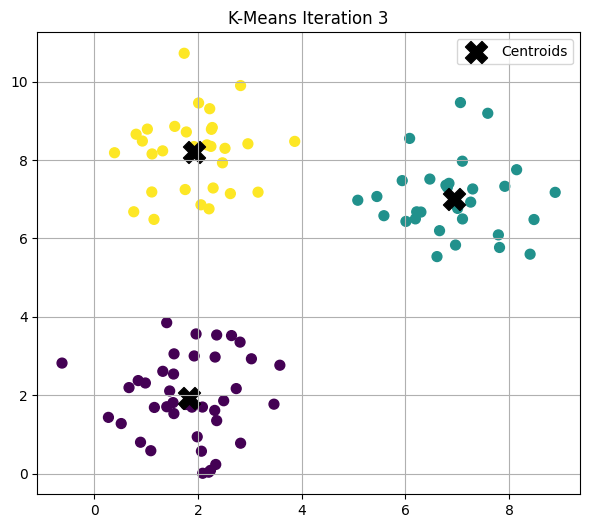

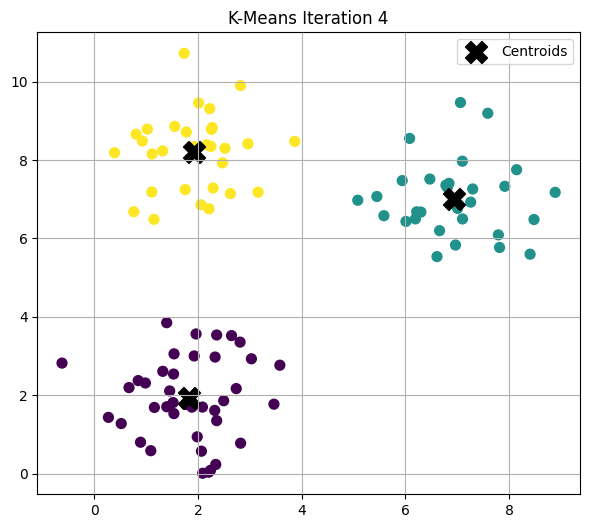

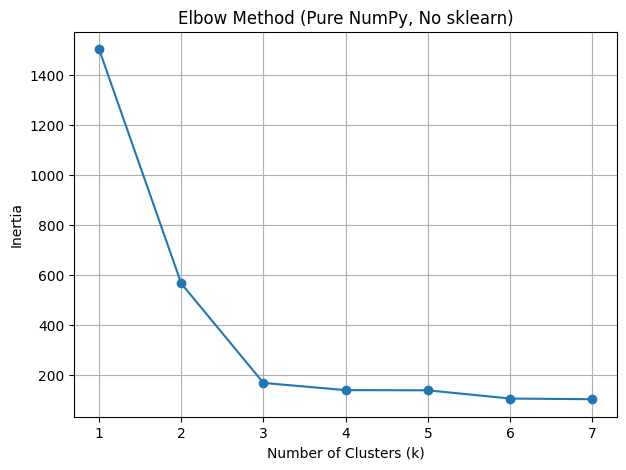

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# Generate 100 random 2D samples
# -------------------------------------------------------------
np.random.seed(42)

cluster1 = np.random.randn(40, 2) + np.array([2, 2])
cluster2 = np.random.randn(30, 2) + np.array([7, 7])
cluster3 = np.random.randn(30, 2) + np.array([2, 8])

X = np.vstack([cluster1, cluster2, cluster3])
k = 3  # number of clusters

# -------------------------------------------------------------
# K-Means++ initialization
# -------------------------------------------------------------
def kmeans_plus_plus_init(X, k):
    n_samples = len(X)
    centroids = []

    # Step 1: choose first centroid randomly
    first_idx = np.random.randint(0, n_samples)
    centroids.append(X[first_idx])

    # Step 2: choose remaining centroids
    for _ in range(1, k):
        # Squared distance to nearest centroid
        dist_sq = np.array([
            min(np.sum((x - c)**2) for c in centroids)
            for x in X
        ])
        
        # Probability proportional to distance
        probs = dist_sq / dist_sq.sum()

        # Choose next centroid
        next_idx = np.random.choice(n_samples, p=probs)
        centroids.append(X[next_idx])

    return np.array(centroids)

# -------------------------------------------------------------
# Assign step
# -------------------------------------------------------------
def assign_clusters(X, centroids):
    labels = np.array([
        np.argmin([np.sum((x - c)**2) for c in centroids])
        for x in X
    ])
    return labels

# -------------------------------------------------------------
# Update step
# -------------------------------------------------------------
def update_centroids(X, labels, k):
    centroids = np.array([
        X[labels == i].mean(axis=0)
        for i in range(k)
    ])
    return centroids

# -------------------------------------------------------------
# Run K-Means for several iterations
# -------------------------------------------------------------
num_iters = 4
centroids = kmeans_plus_plus_init(X, k)

centroids_list = [centroids]
labels_list = []

for _ in range(num_iters):
    labels = assign_clusters(X, centroids)
    centroids = update_centroids(X, labels, k)
    
    labels_list.append(labels)
    centroids_list.append(centroids)

# -------------------------------------------------------------
# Plot all iterations
# -------------------------------------------------------------
for i in range(num_iters):
    plt.figure(figsize=(7, 6))
    
    plt.scatter(X[:, 0], X[:, 1], c=labels_list[i], s=50)
    plt.scatter(centroids_list[i+1][:, 0], centroids_list[i+1][:, 1],
                c="black", marker="X", s=250, label="Centroids")
    
    plt.title(f"K-Means Iteration {i+1}")
    plt.grid(True)
    plt.legend()
    plt.show()

# -------------------------------------------------------------
# Full K-Means for elbow method (pure NumPy)
# -------------------------------------------------------------
def kmeans_full(X, k, max_iter=20):
    centroids = kmeans_plus_plus_init(X, k)

    for _ in range(max_iter):
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)

    # Compute inertia (sum of squared distances)
    inertia = np.sum([
        np.sum((X[labels == i] - centroids[i])**2)
        for i in range(k)
    ])
    return inertia

# -------------------------------------------------------------
# Elbow method (no sklearn)
# -------------------------------------------------------------
Ks = range(1, 8)
inertias = [kmeans_full(X, k_val) for k_val in Ks]

plt.figure(figsize=(7, 5))
plt.plot(Ks, inertias, marker="o")
plt.title("Elbow Method (Pure NumPy, No sklearn)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()
